<a href="https://colab.research.google.com/github/ikedoebber/Previsoes-para-Departamento-de-MArketing/blob/main/Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Fonte dos dados:* https://www.kaggle.com/arjunbhasin2013/ccdata

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
creditcard_df = pd.read_csv('/content/Marketing_data.csv')

In [3]:
creditcard_df.shape

(8950, 18)

In [4]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES']==40761.250000	]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [8]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [9]:
creditcard_df[creditcard_df['CASH_ADVANCE']==47137.21176	]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


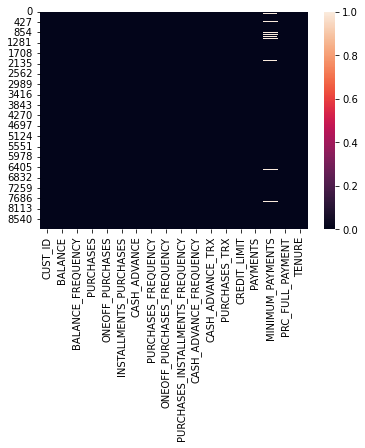

In [10]:
sns.heatmap(creditcard_df.isnull());

In [11]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [13]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [14]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
creditcard_df.duplicated().sum()

0

In [16]:
creditcard_df.drop('CUST_ID', axis=1,inplace=True)

In [17]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


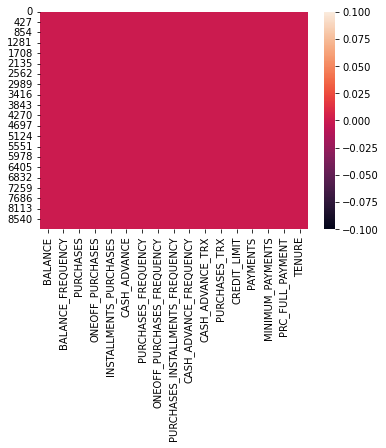

In [18]:
sns.heatmap(creditcard_df.isnull());

In [19]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

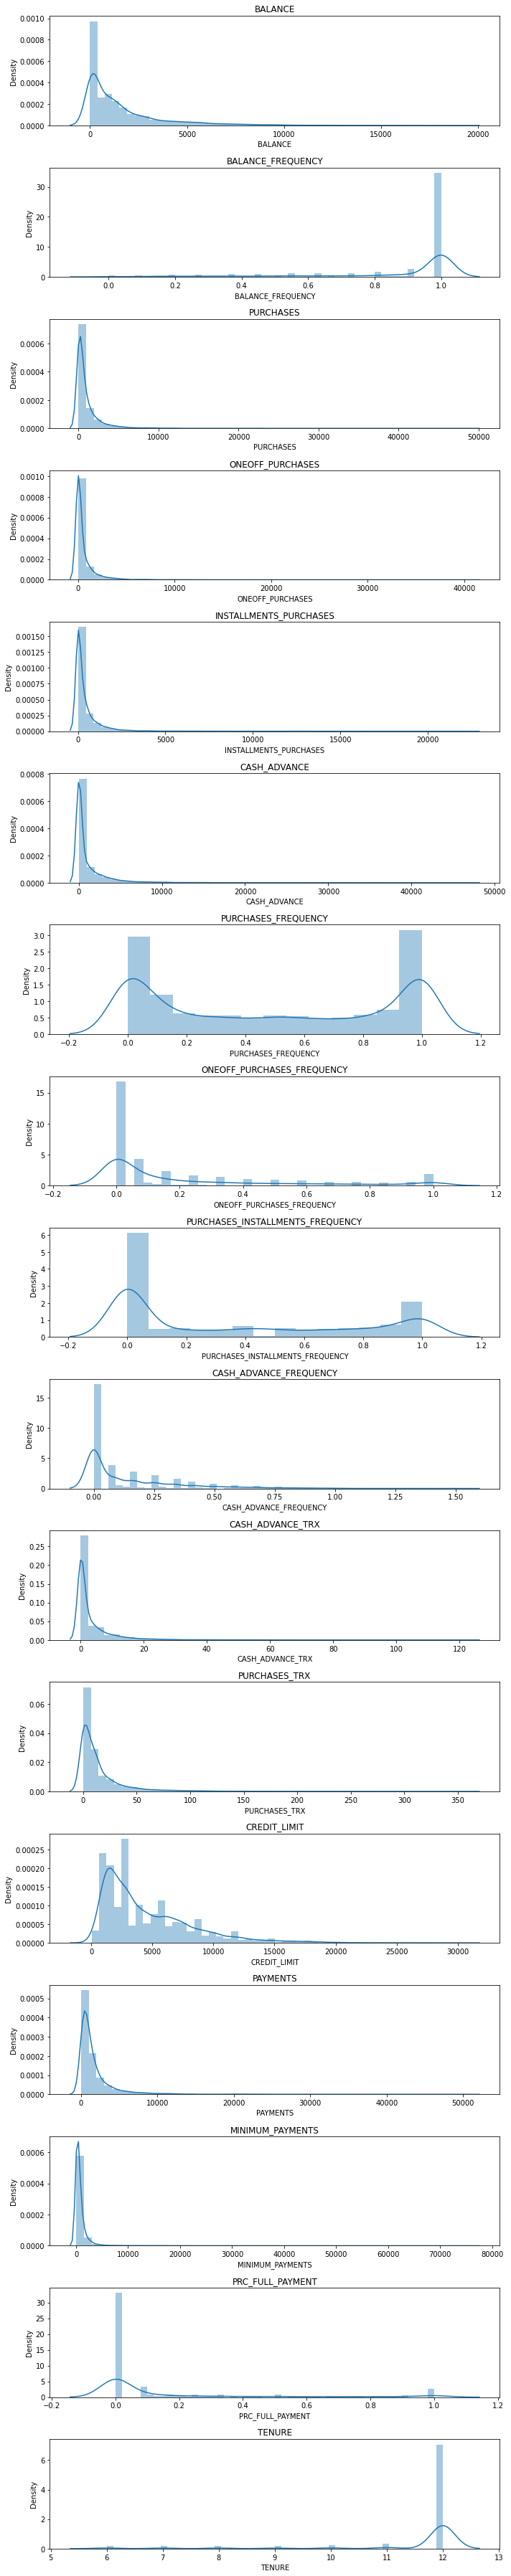

In [20]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17,1,i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde=True)
  plt.title(creditcard_df.columns[i])
plt.tight_layout();

In [21]:
correlations = creditcard_df.corr()

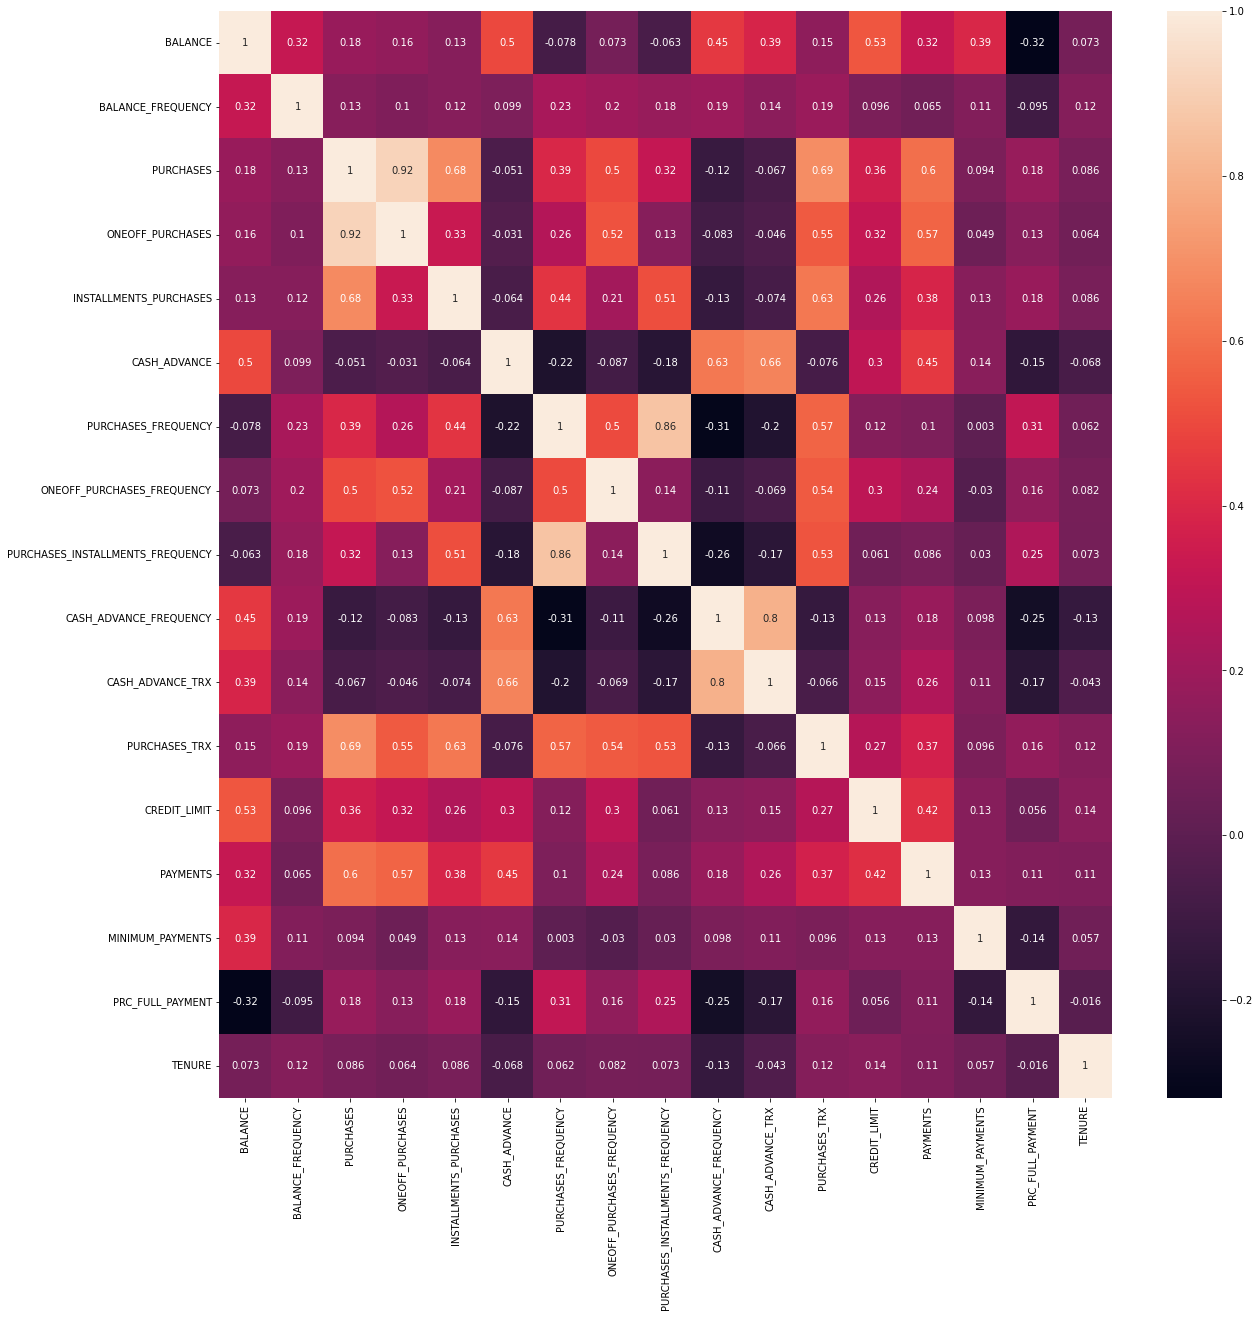

In [22]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations,annot=True);

# **Elbow Method**

In [23]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [24]:
scaler= StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [25]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [26]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [27]:
wcss_1 =[]
range_values= range(1,20)
for i in range_values:
  kmeans= KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  wcss_1.append(kmeans.inertia_)

In [28]:
print(wcss_1)

[152149.99999999983, 127784.9305142329, 111986.41260080234, 99073.93826774803, 91502.98259428913, 84851.26725046977, 79532.32854113297, 75568.63069612303, 71373.53948971986, 66478.96069032565, 63618.65305285613, 61364.63471054665, 59175.51555761288, 57510.222125377855, 55832.22760101374, 54268.14492347662, 53339.13795749174, 51752.44402037759, 50677.4095083056]


Text(0, 0.5, 'WCSS')

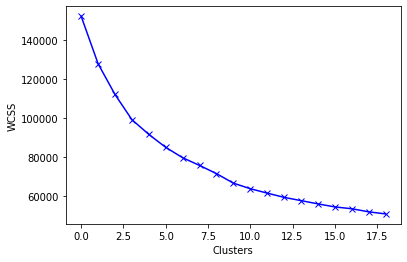

In [29]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

# **Agrupamento com KMeans**

In [30]:
kmeans =KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled)
labels=kmeans.labels_

In [31]:
labels, len(labels)

(array([6, 3, 2, ..., 1, 6, 4], dtype=int32), 8950)

In [32]:
np.unique(labels, return_counts=True)


(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([  56, 2150, 1201,  954, 1294,   25, 2899,  371]))

In [33]:
kmeans.cluster_centers_

array([[ 1.22399429e+00,  4.70113929e-01, -6.98228111e-02,
        -2.29471544e-01,  2.55889909e-01,  1.26383097e-01,
        -7.70776729e-02, -4.82304868e-01,  1.18143813e-01,
        -8.78752575e-02,  3.94226058e-02,  4.68762227e-02,
        -2.54682013e-02, -4.41000918e-03,  9.40516903e+00,
        -5.20463188e-01,  2.93961581e-01],
       [-4.00679805e-01,  3.06223076e-01, -6.12500903e-02,
        -2.56720685e-01,  3.26772492e-01, -3.62049724e-01,
         9.82606449e-01, -4.11115132e-01,  1.17700675e+00,
        -4.60510576e-01, -3.56702967e-01,  1.37303204e-01,
        -3.19592939e-01, -2.43229715e-01, -1.20679510e-01,
         3.64439845e-01, -2.99553691e-02],
       [-1.34316441e-01,  3.92784327e-01,  5.02343766e-01,
         6.25122677e-01,  3.91803565e-02, -3.30567988e-01,
         9.53629901e-01,  1.83326202e+00,  1.67815265e-01,
        -4.10150068e-01, -3.32591828e-01,  5.82971906e-01,
         4.16128927e-01,  1.15353037e-01, -1.58469392e-01,
         4.00791185e-01,  1.9

In [34]:
cluster_centers= pd.DataFrame(data= kmeans.cluster_centers_,columns=[creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.223994,0.470114,-0.069823,-0.229472,0.255890,0.126383,-0.077078,-0.482305,0.118144,-0.087875,0.039423,0.046876,-0.025468,-0.004410,9.405169,-0.520463,0.293962
1,-0.400680,0.306223,-0.061250,-0.256721,0.326772,-0.362050,0.982606,-0.411115,1.177007,-0.460511,-0.356703,0.137303,-0.319593,-0.243230,-0.120680,0.364440,-0.029955
2,-0.134316,0.392784,0.502344,0.625123,0.039180,-0.330568,0.953630,1.833262,0.167815,-0.410150,-0.332592,0.582972,0.416129,0.115353,-0.158469,0.400791,0.198507
3,1.564488,0.371828,-0.230578,-0.163015,-0.245780,1.941256,-0.479607,-0.208050,-0.427316,1.908753,1.845925,-0.278084,0.953921,0.734882,0.333612,-0.391592,-0.100667
4,-0.698229,-2.136616,-0.317995,-0.236650,-0.317026,-0.306960,-0.566102,-0.435206,-0.460492,-0.484337,-0.360449,-0.427824,-0.216825,-0.223153,-0.255352,0.250724,-0.164237
5,1.819469,0.301643,12.207777,12.296446,6.272587,0.242957,1.002411,2.032081,0.866148,-0.392172,-0.124384,4.369530,3.261192,8.782991,1.003073,1.152351,0.300900
6,-0.017078,0.370095,-0.361932,-0.245231,-0.405167,-0.080517,-0.868911,-0.401878,-0.768099,0.140310,-0.024436,-0.489692,-0.343262,-0.267720,-0.075096,-0.453712,-0.004953
7,0.996377,0.467295,2.452236,1.838048,2.421546,-0.159713,1.164851,1.595042,1.263594,-0.280361,-0.152980,3.054614,1.280668,1.428517,0.344263,0.271755,0.338524


In [35]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers,columns=[creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4112.115628,0.988636,854.027321,211.561607,642.465714,1243.902370,0.459416,0.058577,0.411391,0.117559,3.517857,15.875000,4401.785714,1720.377308,22782.556227,0.001488,11.910714
1,730.493635,0.949812,872.343072,166.333615,706.563954,219.635928,0.884718,0.079814,0.832210,0.042991,0.814591,18.122677,3331.639584,1029.017661,582.968036,0.260307,11.477230
2,1284.906494,0.970318,2076.470033,1630.012980,446.497955,285.654599,0.873088,0.749355,0.431131,0.053069,0.979132,29.200334,6008.496737,2067.079592,494.900309,0.270939,11.782972
3,4820.825569,0.965353,510.570943,321.866122,188.811394,5049.775439,0.297861,0.140392,0.194611,0.517105,15.845912,7.797694,7965.203926,3860.553979,1641.676215,0.039181,11.382600
4,111.169832,0.371126,323.803122,199.647504,124.384985,335.162289,0.263147,0.072627,0.181426,0.038223,0.789026,4.075734,3705.551695,1087.137926,269.119085,0.227047,11.297527
5,5351.546106,0.948727,27085.309200,21002.018800,6083.290400,1488.363253,0.892667,0.808667,0.708667,0.056667,2.400000,123.320000,16360.000000,27159.043527,3201.825604,0.490758,11.920000
6,1528.928698,0.964943,229.930490,185.404128,44.680114,810.023746,0.141615,0.082570,0.059175,0.163222,3.082069,2.537931,3245.522989,958.121272,689.197454,0.021012,11.510690
7,3638.349644,0.987969,6242.445472,3643.220863,2600.841860,643.944690,0.957862,0.678290,0.866622,0.079041,2.204852,90.636119,9154.043127,5868.561298,1666.496383,0.233198,11.970350


In [36]:
creditcard_df_cluster =pd.concat([creditcard_df,pd.DataFrame({'cluster': labels})],axis=1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,6
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,6
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,6


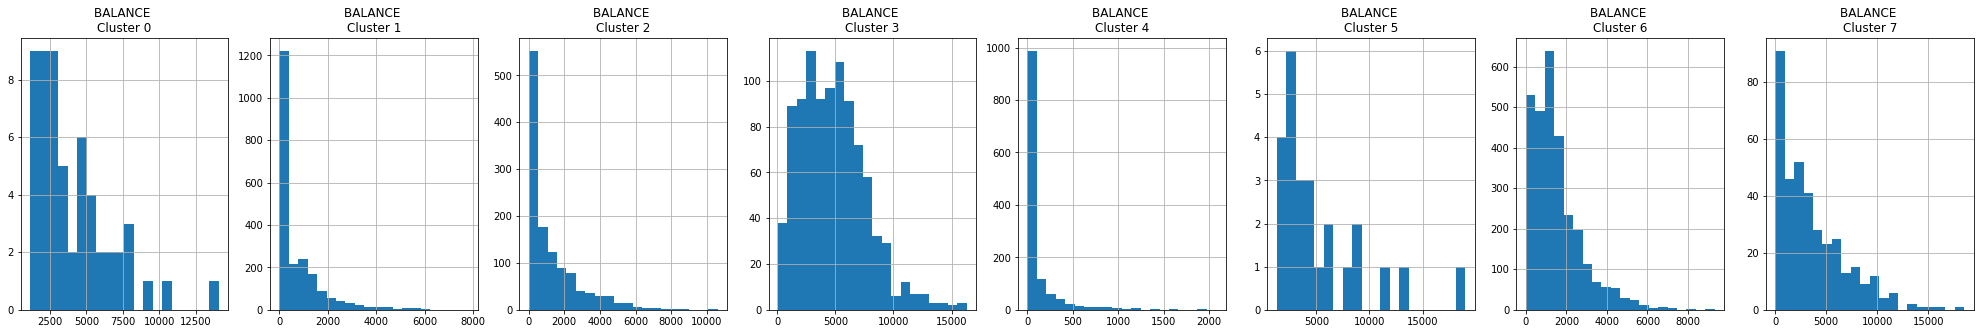

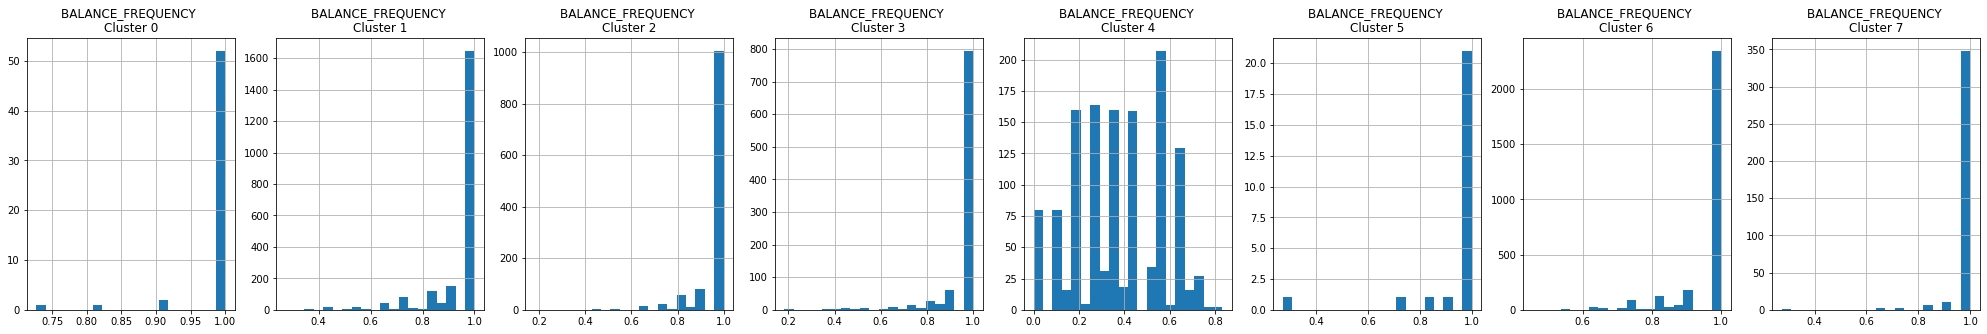

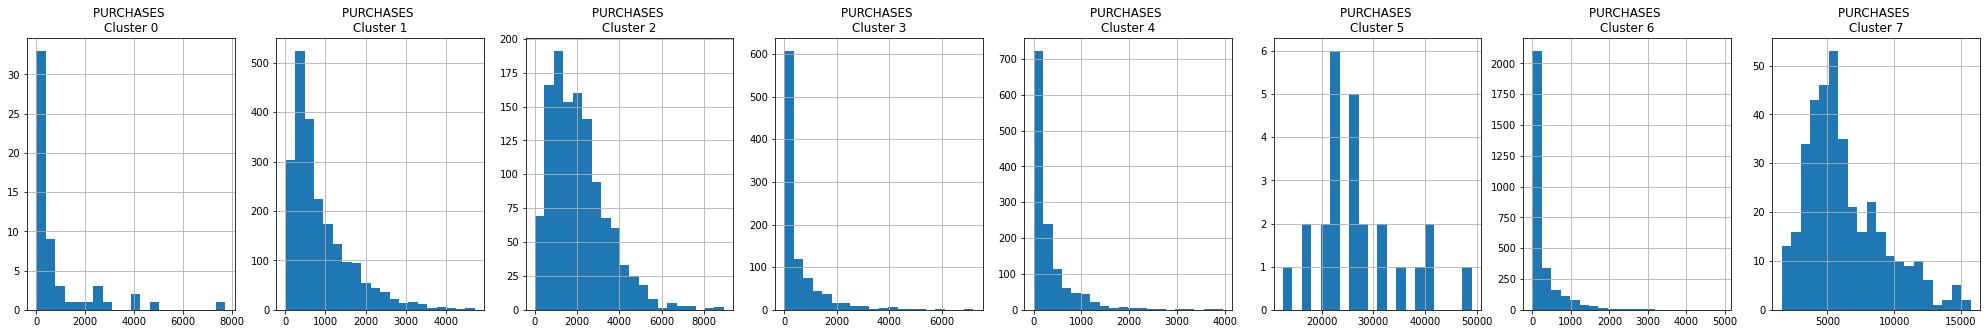

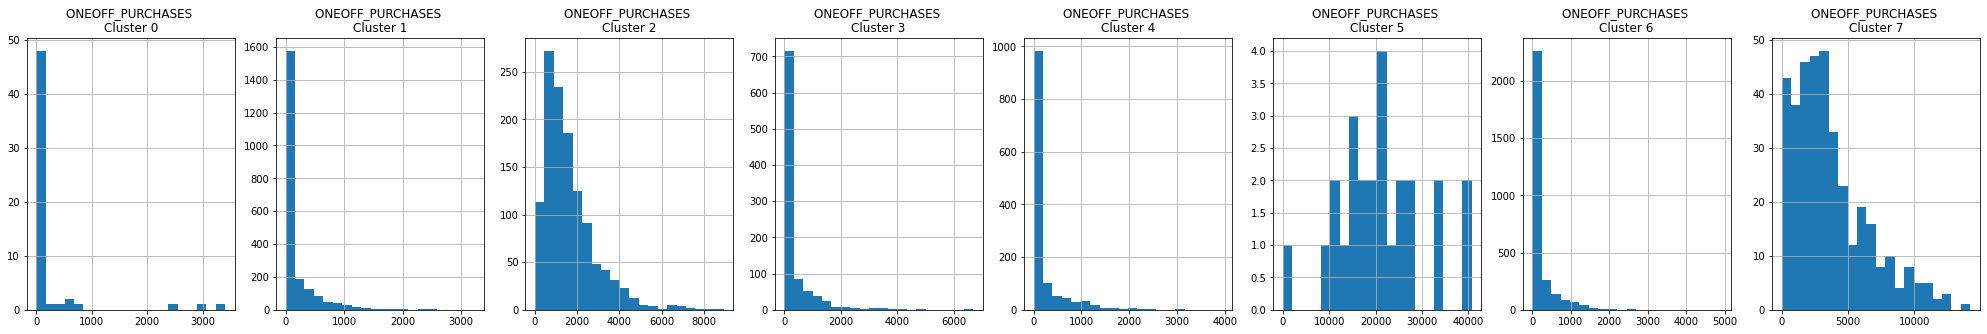

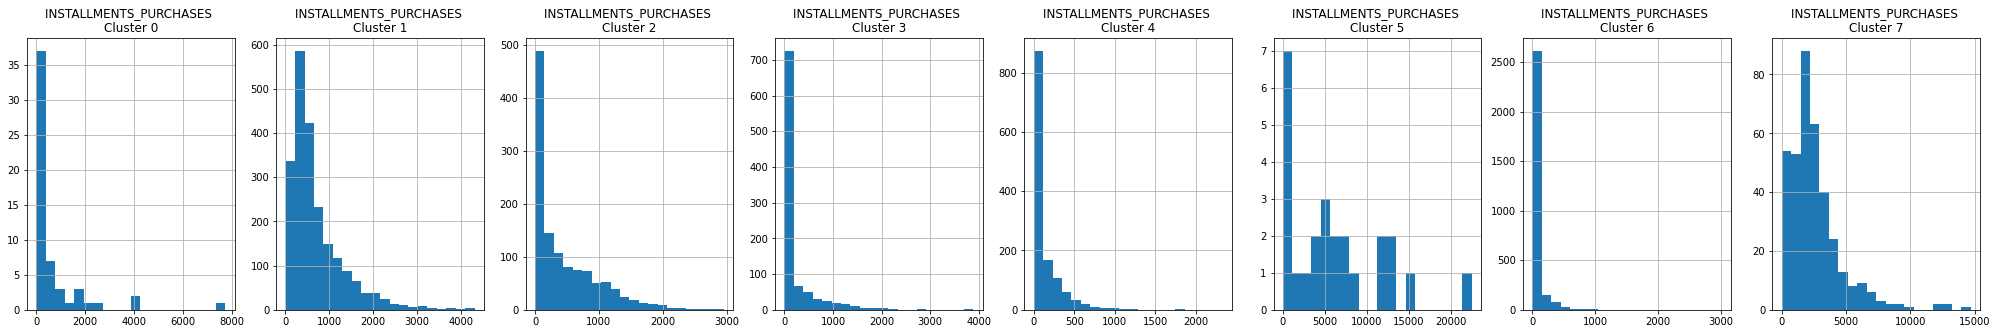

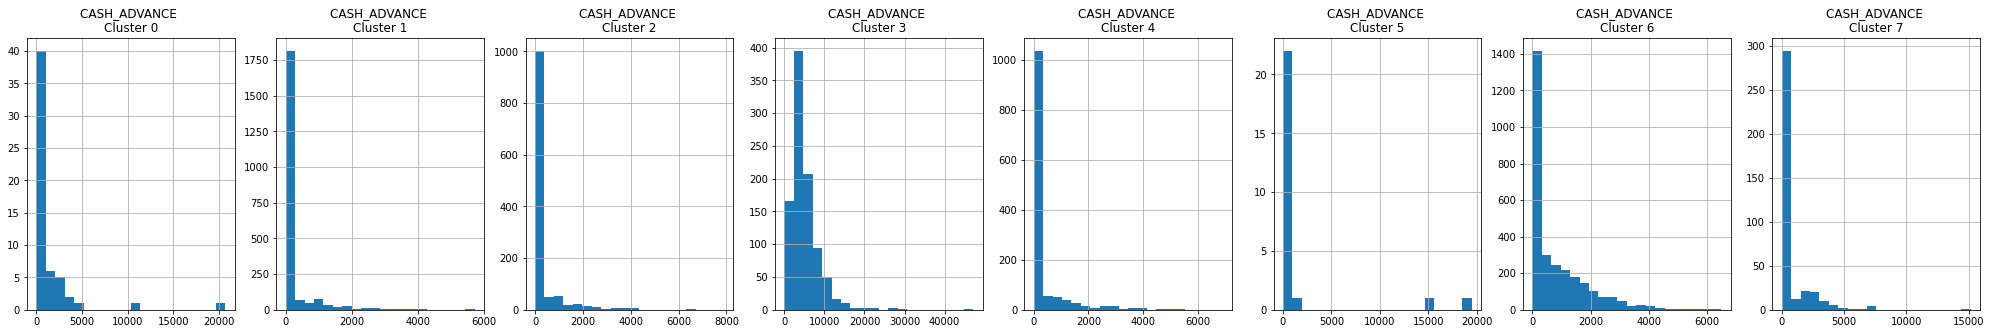

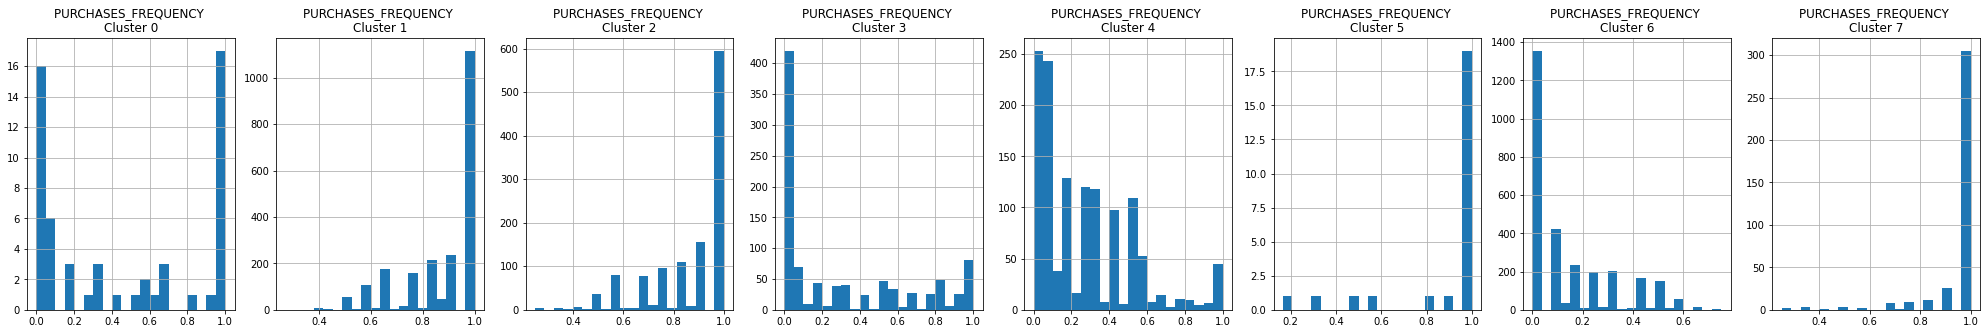

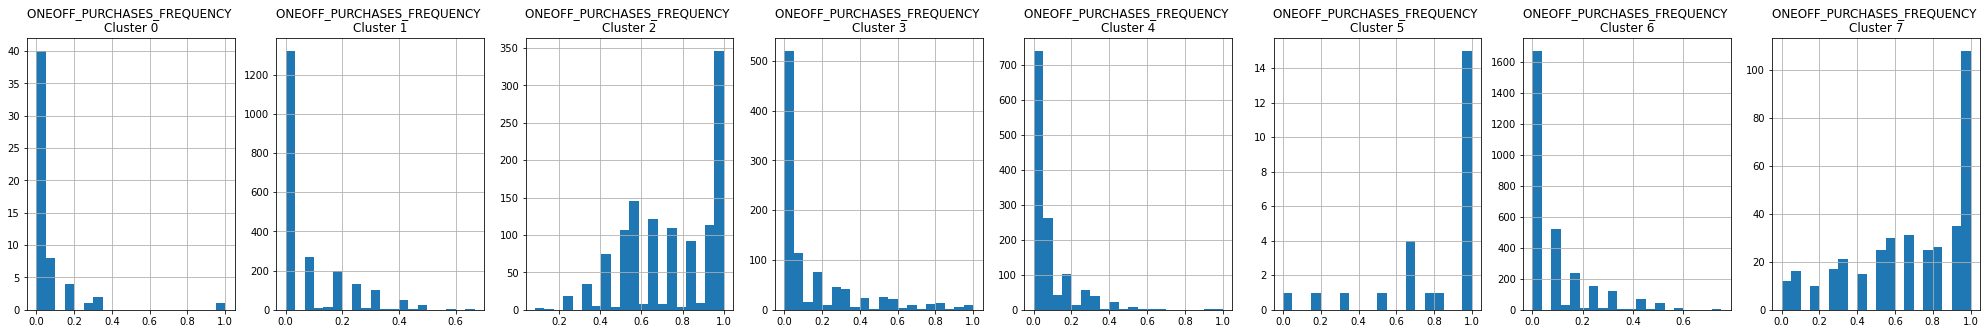

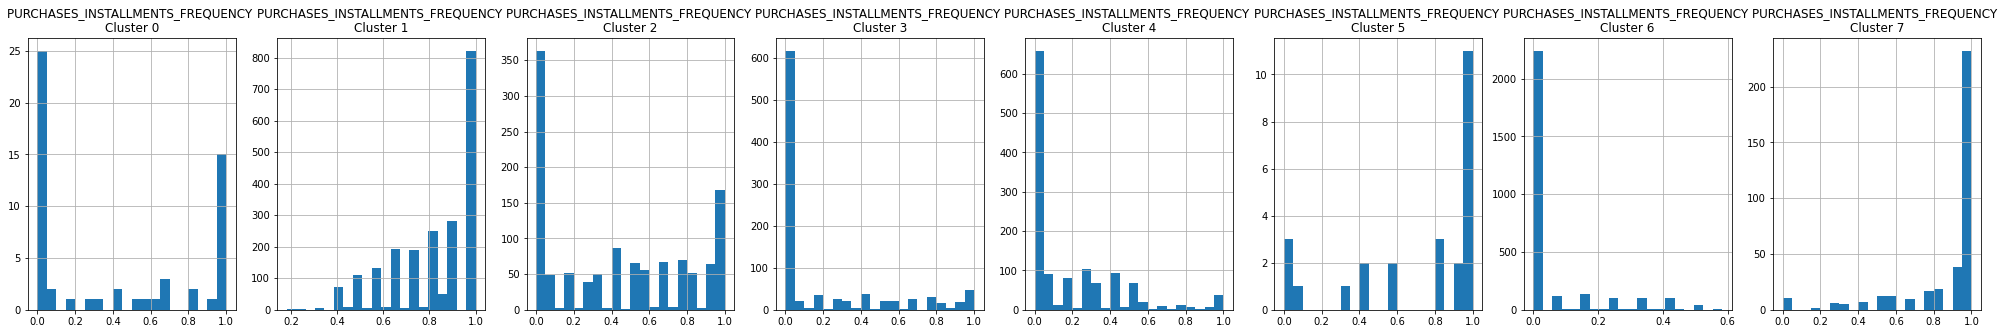

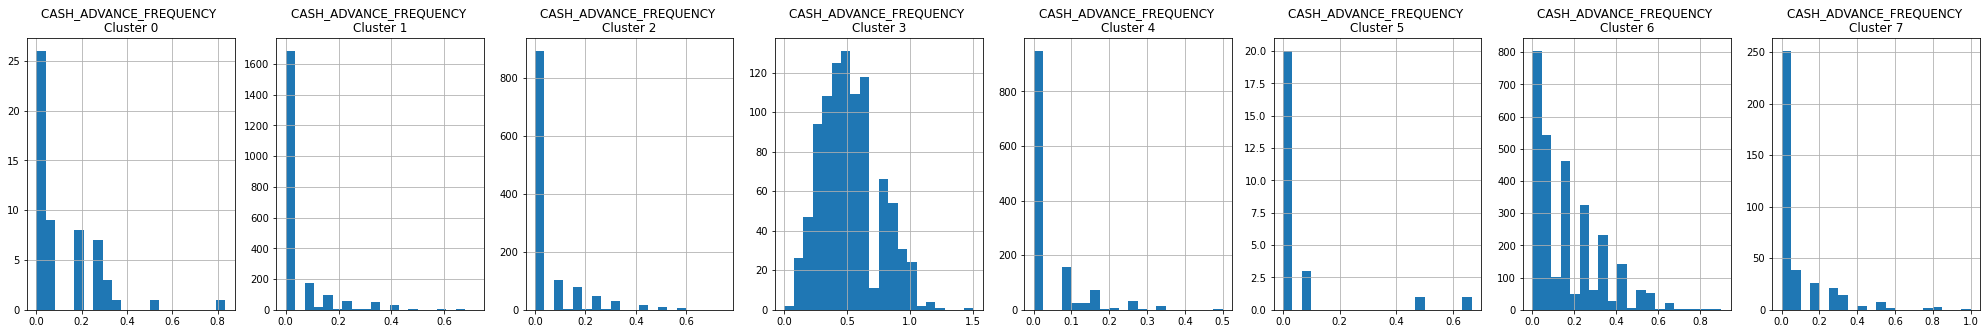

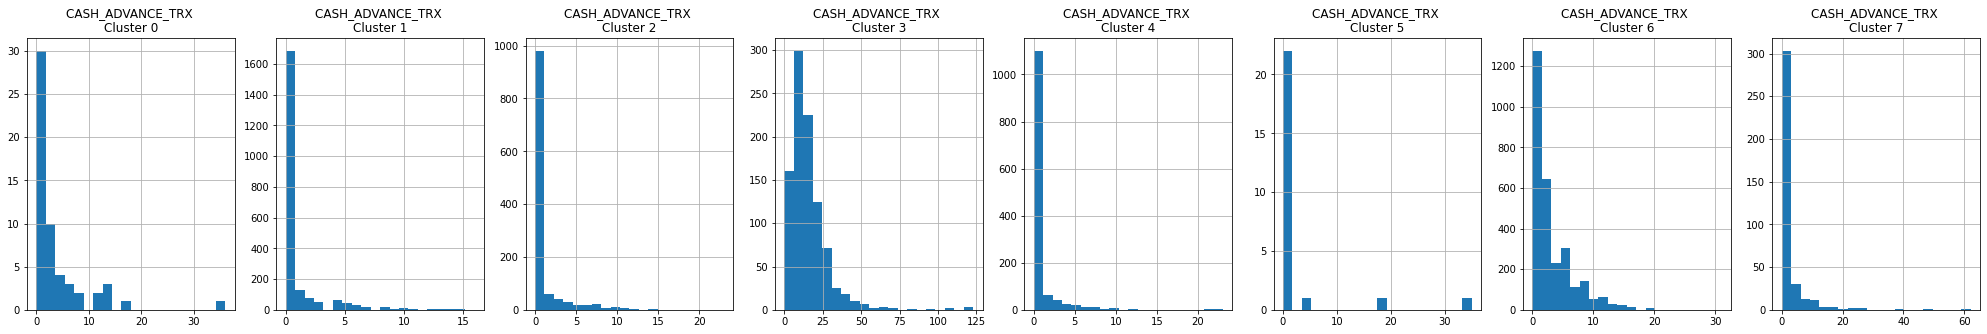

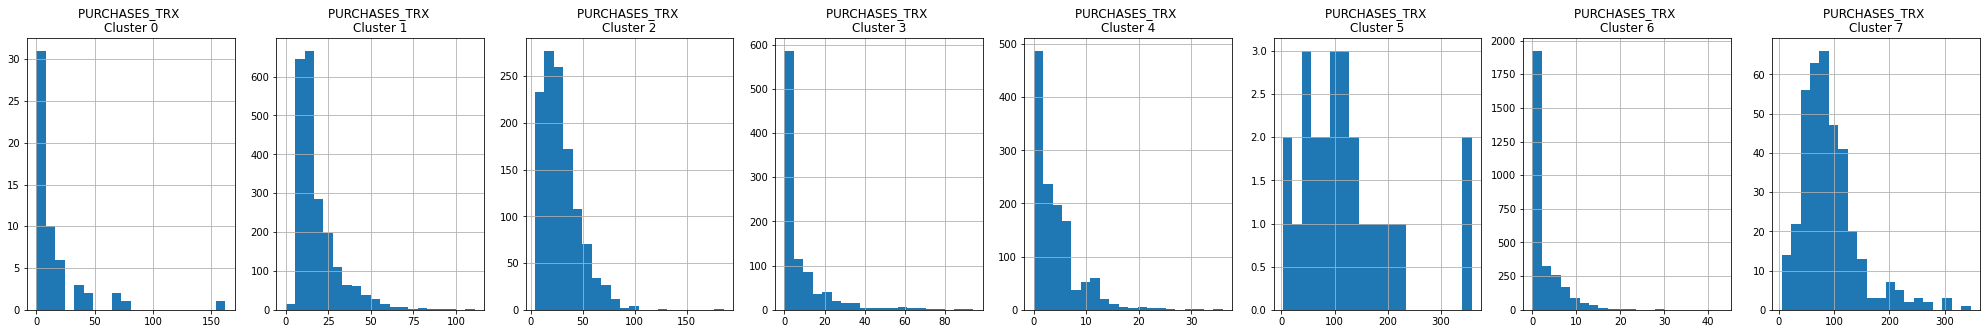

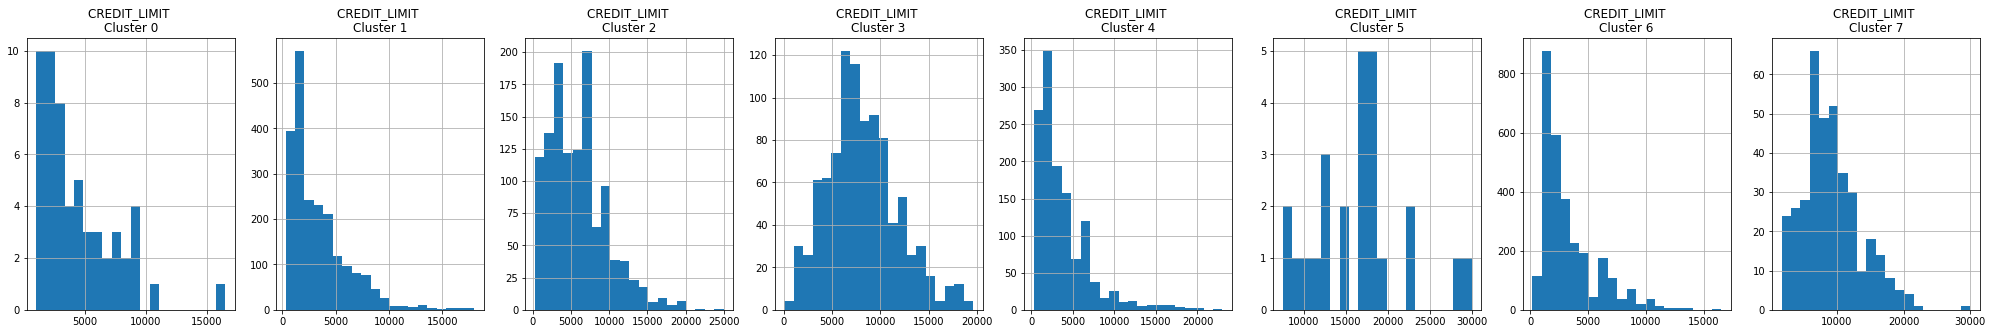

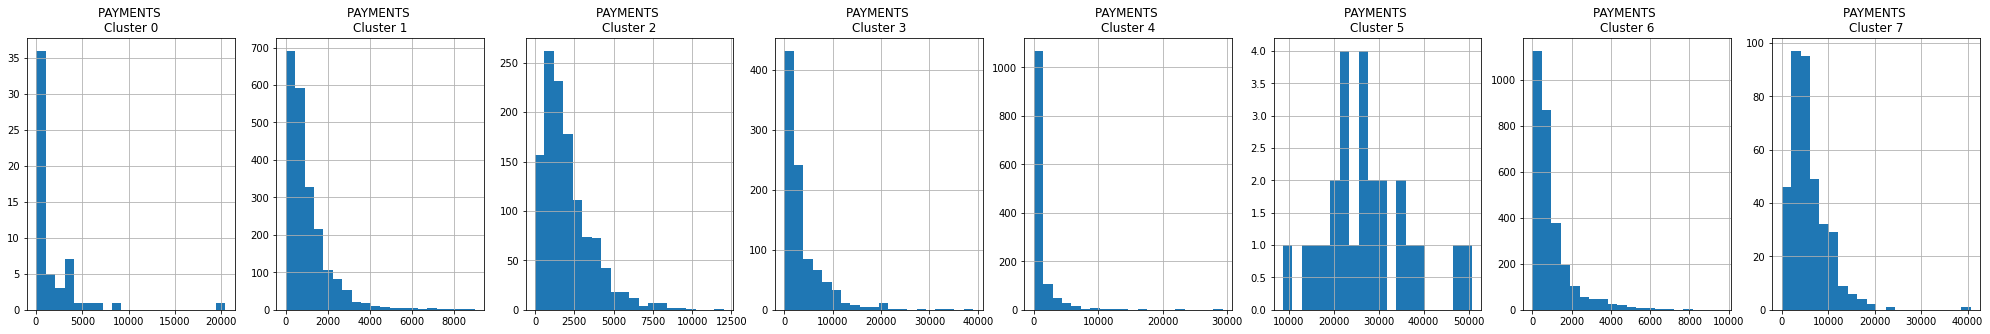

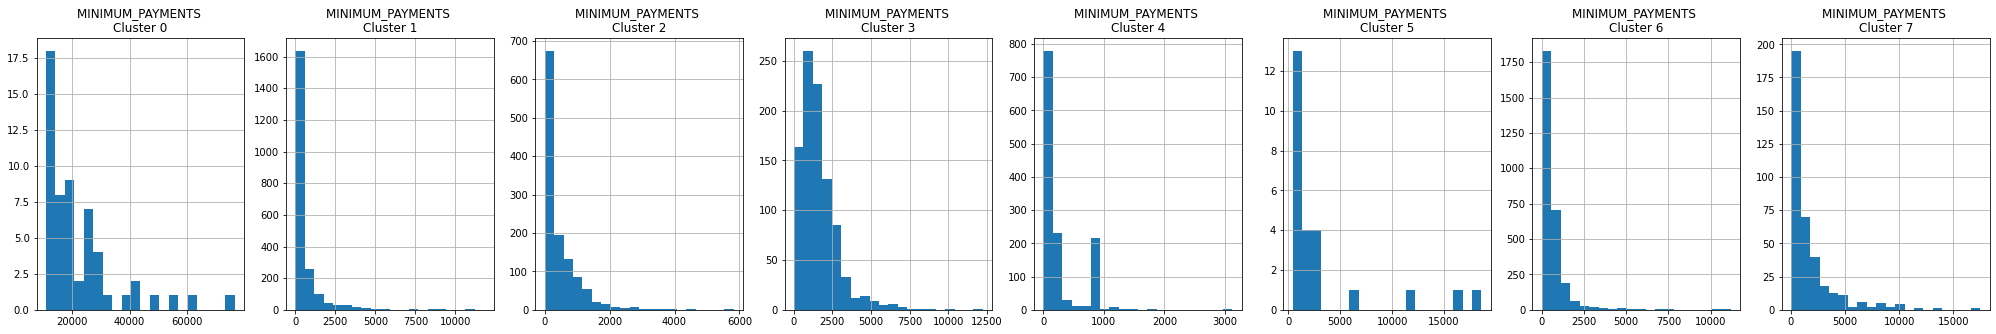

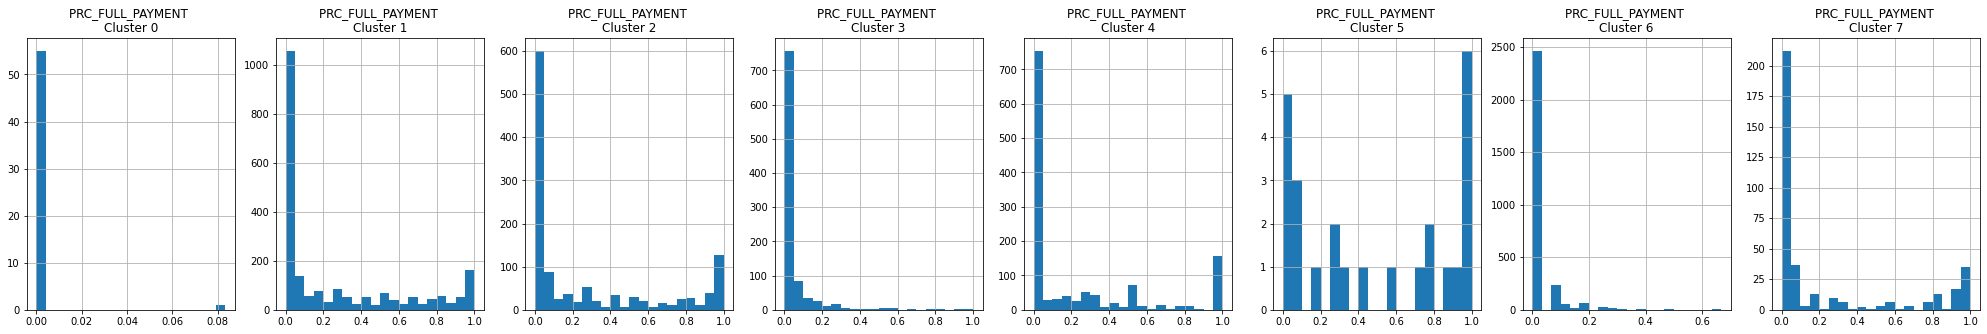

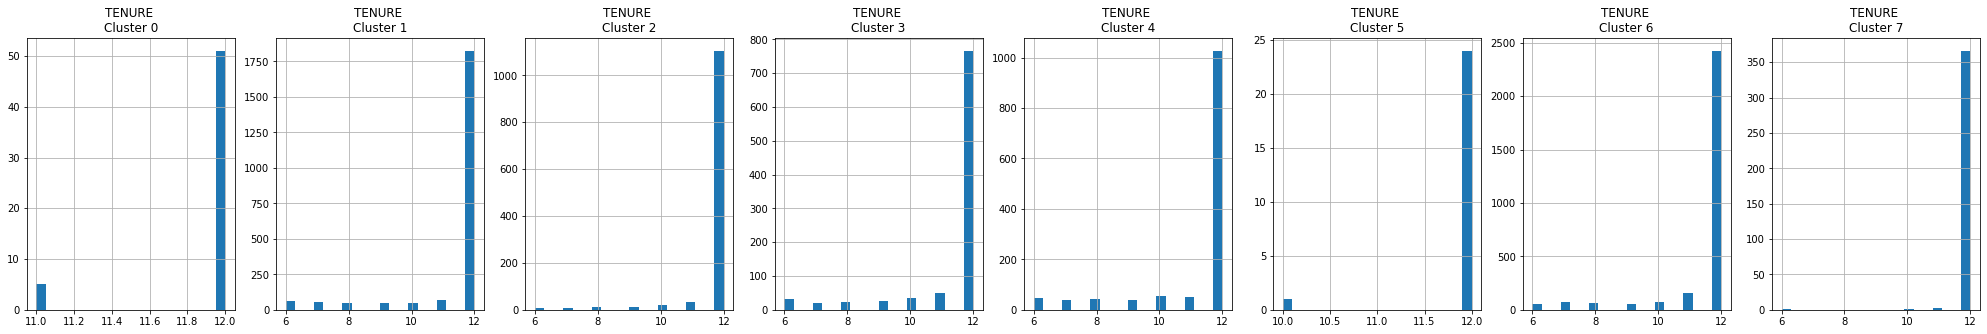

In [37]:
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
   plt.subplot(1,8,j+1)
   cluster= creditcard_df_cluster[creditcard_df_cluster['cluster']== j]
   cluster[i].hist(bins=20)
   plt.title('{} \nCluster {}'.format(i,j))
plt.show()

In [38]:
credit_ordered = creditcard_df_cluster.sort_values(by= 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
5741,4932.396527,1.0,0.00,0.00,0.00,245.596578,0.000000,0.000000,0.000000,0.166667,3,0,6000.0,5403.894447,14437.12209,0.0,12,0
5657,4628.109931,1.0,912.54,0.00,912.54,0.000000,1.000000,0.000000,1.000000,0.000000,0,21,5000.0,3746.305759,56370.04117,0.0,12,0
5005,6963.435383,1.0,2951.93,2951.93,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,10,8000.0,1069.094662,11142.93224,0.0,12,0
7132,9024.812044,1.0,0.00,0.00,0.00,2750.442399,0.000000,0.000000,0.000000,0.083333,2,0,9000.0,302.484224,61031.61860,0.0,12,0
2599,3586.051050,1.0,141.00,40.00,101.00,1072.395255,0.500000,0.083333,0.416667,0.250000,3,7,4350.0,3843.798591,11760.91651,0.0,12,0


In [39]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4291,674.119098,1.000000,3146.25,449.10,2697.15,0.000000,1.000000,0.333333,1.000000,0.000000,0,93,4000.0,2602.065596,189.152731,0.000000,12,7
2811,2432.276042,1.000000,7156.11,5921.26,1234.85,1543.726862,0.833333,0.833333,0.666667,0.166667,3,198,9500.0,1914.832296,621.422606,0.083333,12,7
2803,169.019496,1.000000,4769.98,1164.35,3605.63,0.000000,1.000000,0.583333,1.000000,0.000000,0,56,4500.0,3998.399141,178.551031,1.000000,12,7
938,391.179957,0.909091,7363.38,6965.06,398.32,0.000000,0.833333,0.666667,0.416667,0.000000,0,42,4500.0,11891.449070,889.957080,1.000000,12,7
3609,3516.835582,1.000000,4019.73,1932.75,2086.98,0.000000,0.916667,0.916667,1.000000,0.000000,0,73,12000.0,3376.573790,910.942173,0.000000,12,7


In [40]:
credit_ordered.to_csv('cluster.csv')

# **Aplicação PCA e visualização dos resultados**

In [41]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222002, -1.07645094],
       [-1.13829451,  2.50647687],
       [ 0.96968356, -0.38353644],
       ...,
       [-0.92620346, -1.81078495],
       [-2.33655148, -0.65795747],
       [-0.5564227 , -0.40046388]])

In [42]:
pca_df = pd.DataFrame(data= principal_comp, columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076451
1,-1.138295,2.506477
2,0.969684,-0.383536
3,-0.873627,0.043163
4,-1.599434,-0.688580


In [43]:
pca_df= pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076451,6
1,-1.138295,2.506477,3
2,0.969684,-0.383536,2
3,-0.873627,0.043163,6
4,-1.599434,-0.688580,6


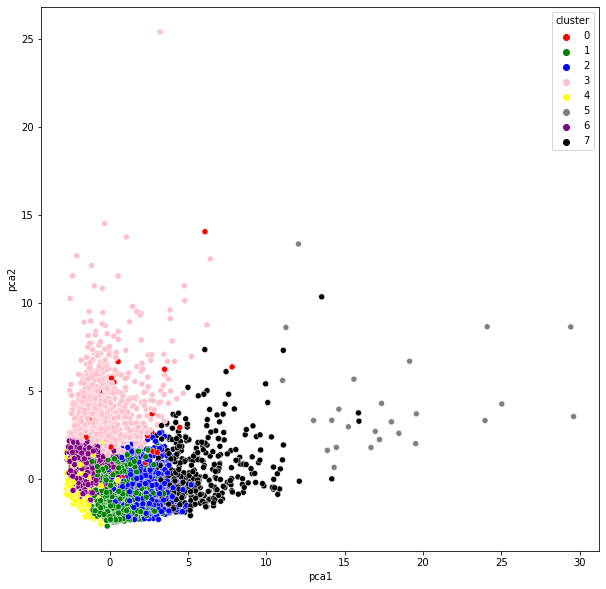

In [44]:
plt.figure(figsize=(10,10))
sns.scatterplot(x= 'pca1', y='pca2',hue ='cluster',data =pca_df, palette=['red','green','blue','pink','yellow','gray','purple','black']);

# **AutoEncoders**

In [45]:
creditcard_df_scaled.shape

(8950, 17)

In [46]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [47]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [48]:
autoencoder = Model(input_df, decoded)

In [49]:
encoder = Model(input_df, encoded)

In [50]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [51]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 8s 26ms/step - loss: 0.1844
Epoch 2/50
280/280 [==============================] - 7s 26ms/step - loss: 0.0527
Epoch 3/50
280/280 [==============================] - 10s 36ms/step - loss: 0.0552
Epoch 4/50
280/280 [==============================] - 11s 39ms/step - loss: 0.0443
Epoch 5/50
280/280 [==============================] - 7s 26ms/step - loss: 0.0317
Epoch 6/50
280/280 [==============================] - 7s 26ms/step - loss: 0.0265
Epoch 7/50
280/280 [==============================] - 7s 26ms/step - loss: 0.0296
Epoch 8/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0374
Epoch 9/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0193
Epoch 10/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0169
Epoch 11/50
280/280 [==============================] - 7s 26ms/step - loss: 0.0180
Epoch 12/50
280/280 [==============================] - 7s 26ms/step - loss: 0.0183
Epoch 13/50

In [52]:
creditcard_df_scaled.shape

(8950, 17)

In [53]:
compact = encoder.predict(creditcard_df_scaled)

In [54]:
compact.shape

(8950, 10)

In [55]:
creditcard_df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [56]:
compact[0]

array([0.31691486, 0.07815969, 0.28127164, 0.5773028 , 0.55288875,
       0.05350905, 0.02798844, 0.13588017, 0.8386589 , 0.3804307 ],
      dtype=float32)

In [58]:
wcss_2 =[]
range_values = range(1,20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

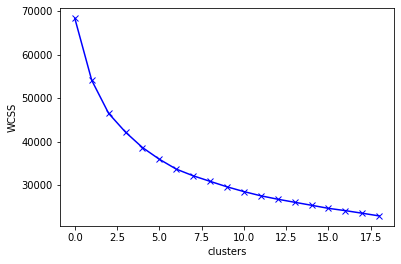

In [59]:
plt.plot(wcss_2,'bx-')
plt.xlabel('clusters')
plt.ylabel('WCSS');

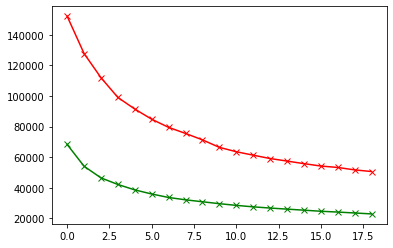

In [60]:
plt.plot(wcss_1,'bx-',color='r')
plt.plot(wcss_2,'bx-',color='g');

In [62]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(n_clusters=4)

In [63]:
labels = kmeans.labels_
labels,labels.shape

(array([1, 1, 1, ..., 2, 2, 2], dtype=int32), (8950,))

In [64]:
df_cluster_at= pd.concat([creditcard_df, pd.DataFrame({'cluster:labels'})],axis =1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,0
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,cluster:labels
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,NaN
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,NaN
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,NaN
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,NaN


In [65]:
pca= PCA(n_components=2)
prin_comp= pca.fit_transform(compact)
pca_df = pd.DataFrame(data=prin_comp, columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.410139,-0.202366
1,0.271951,1.260775
2,-0.569773,-0.259385
3,0.381289,0.100346
4,-1.673394,-0.237377


In [66]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.410139,-0.202366,1
1,0.271951,1.260775,1
2,-0.569773,-0.259385,1
3,0.381289,0.100346,2
4,-1.673394,-0.237377,1


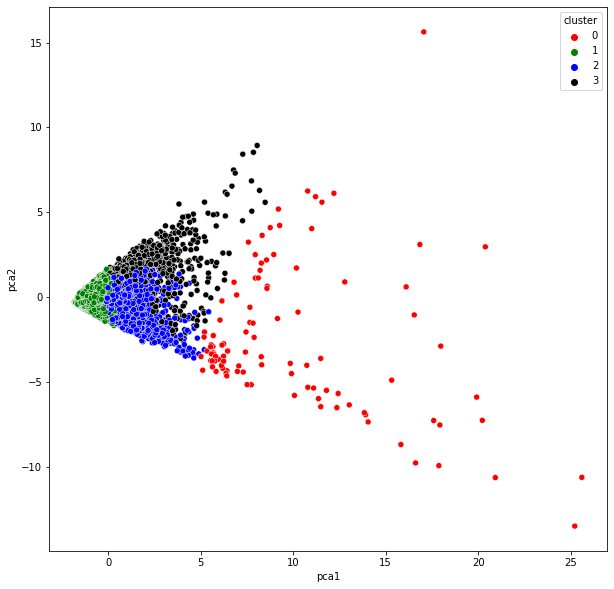

In [69]:
plt.figure(figsize=(10,10))
sns.scatterplot(x= 'pca1', y='pca2',hue ='cluster',data =pca_df, palette=['red','green','blue','black']);

In [73]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')
df_cluster_ordered.head()

KeyError: ignored

In [72]:
df_cluster_ordered.tail()

NameError: ignored

In [74]:
df_cluster_ordered.to_excel('cluster_ordereded.xls')

NameError: ignored